<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<br>  
<p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p>
<p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p>
    
<br>
<br>   
<br>
<br>

<h1 style="text-align: center"> Data Science Programming 2 (Python) </h1>
<h1 style="text-align: center"> Endterm Project: Predicting flight cancellations </h1> 

<br>
<br>


<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2008</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Assylnur Lesken,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Yerkegul Assaiyn</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Kaisar Mussalim</p>

<br>
<br>

<p style="text-align: center; font-size: 18px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
from datetime import timedelta
from statistics import mode

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.linear_model as skl_lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve,auc
from sklearn.metrics import fbeta_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

# Introduction

This is the first part of flight cancellation prediction i.e. for the month of January. This data is collected from the Bureau of Transportation Statistics, Govt. of the USA. This data is open-sourced under U.S. Govt. Works. This dataset contains all the flights in the month of January 2019 and January 2020. There are more than 400,000 flights in the month of January itself throughout the United States. The features were manually chosen to do a primary time series analysis. 

This data could well be used to predict the flight cancellation at the destination airport specifically for the month of January in upcoming years as the data is for January only.

Predict whether a particular flight will be cancelled or not. 

**About the Dataset**

This file contains all the flights starting from 1st January 2019 till 31st January 2019. There are around 584,000 rows in this file and 22 feature columns indicating the features of the flight including information about origin airport, destination airport, airplane information, departure time and arrival time.

In [51]:
df = pd.read_csv('Jan_2019_ontime.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [52]:
df.shape

(583985, 22)

There are 22 columns and close to 584k records in the downloaded version.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

**'DAY_OF_MONTH':** Day of the month.

**'DAY_OF_WEEK':** Day of the week.

**'OP_UNIQUE_CARRIER':** Unique transport code.

**'OP_CARRIER_AIRLINE_ID':** Unique aviation operator code.

**'OP_CARRIER':** IATA code of the operator.

**'TAIL_NUM':** Tail number.

**'OP_CARRIER_FL_NUM':** Flight number.

**'ORIGIN_AIRPORT_ID':** Origin airport ID.

**'ORIGIN_AIRPORT_SEQ_ID':** Origin airport ID - SEQ.

**'ORIGIN':** Airport of Origin.

**'DEST_AIRPORT_ID':** ID of the destination airport.

**'DEST_AIRPORT_SEQ_ID':** Destination airport ID - SEQ.

**'DEST':** Destination airport.

**'DEP_TIME':** Flight departure time.

**'DEP_DEL15':** Departure delay indicator.

**'DEP_TIME_BLK':** block of time (hour) where the match has been postponed.

**'ARR_TIME':** Flight arrival time.

**'ARR_DEL15':** Arrival delay indicator.

**'CANCELLED':** Flight cancellation indicator.

**'DIVERTED':** Indicator if the flight has been diverted.

**'DISTANCE':** Distance between airports.

In [54]:
df.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

It looks like there's several columns have missing values cause they provide no value to the data but rather make it messy.

In [55]:
def unique_vals(df):
    res = pd.DataFrame()
    cols = []
    nunique = []
    unique = []
    datatype = []
    num_of_nan = []
    for column in df:
        cols.append(column)
        nunique.append(df[column].nunique() )
        unique.append( df[column].unique() )
        datatype.append(df[column].dtype)
        num_of_nan.append(df[column].isnull().sum())
        
    
    res['col_name'] = cols
    res['number of unique values'] = nunique
    res['unique values'] = unique
    res['dtype'] = datatype
    res['Number_of_nan'] = num_of_nan

    return res.sort_values('number of unique values')

We need to look through all the columns to find out which ones are repeated and which ones are not needed for our project.

In [56]:
unique_vals(df)

,col_name,number of unique values,unique values,dtype,Number_of_nan
21,Unnamed: 21,0,[nan],float64,583985
19,DIVERTED,2,"[0.0, 1.0]",float64,0
18,CANCELLED,2,"[0.0, 1.0]",float64,0
17,ARR_DEL15,2,"[0.0, 1.0, nan]",float64,18022
14,DEP_DEL15,2,"[0.0, 1.0, nan]",float64,16355
1,DAY_OF_WEEK,7,"[2, 3, 4, 5, 6, 7, 1]",int64,0
2,OP_UNIQUE_CARRIER,17,"[9E, AA, MQ, G4, OH, B6, YV, EV, F9, YX, HA, N...",object,0
3,OP_CARRIER_AIRLINE_ID,17,"[20363, 19805, 20398, 20368, 20397, 20409, 203...",int64,0
4,OP_CARRIER,17,"[9E, AA, MQ, G4, OH, B6, YV, EV, F9, YX, HA, N...",object,0
15,DEP_TIME_BLK,19,"[0600-0659, 1400-1459, 1200-1259, 1500-1559, 1...",object,0


We determined that some columns are similar, and perhaps some of them need to be deleted. In the next part, we will learn more about these columns and remove unnecessary ones.

# Data cleaning


In [57]:
def is_columns_same(c1,c2):
    col1 = df[c1].factorize()[0]
    col2 = df[c2].factorize()[0]
    return c1+' and '+c2+' columns are EQUAL' if (col1==col2).all() else'Coulmns are NOT EQUAL'

We decided to create a function to check columns for their equality.

In [58]:
# OP_CARRIER
print(is_columns_same('OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID'))
print(is_columns_same('OP_CARRIER', 'OP_CARRIER_AIRLINE_ID'))

OP_UNIQUE_CARRIER and OP_CARRIER_AIRLINE_ID columns are EQUAL
OP_CARRIER and OP_CARRIER_AIRLINE_ID columns are EQUAL


Here we can see that columns OP_UNIQUE_CARRIER & OP_CARRIER_AIRLINE_ID columns and OP_CARRIER & OP_CARRIER_AIRLINE_ID columns are the same. If you look at the name of the columns, you can notice their similarity. One of them is a digital version of another one.

ORIGIN and ORIGIN_AIRPORT_SEQ_ID columns are EQUAL
ORIGIN and ORIGIN_AIRPORT_ID columns are EQUAL


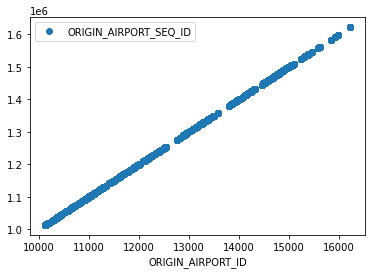

In [59]:
# ORIGIN
print(is_columns_same('ORIGIN','ORIGIN_AIRPORT_SEQ_ID'))
print(is_columns_same('ORIGIN','ORIGIN_AIRPORT_ID'))

df.plot(x='ORIGIN_AIRPORT_ID', y='ORIGIN_AIRPORT_SEQ_ID', style='o');

ORIGIN, ORIGIN_AIRPORT_SEQ_ID and ORIGIN_AIRPORT_ID columns seem different at first glance, but plotting a graph we can specify that the data of these columns are actually similar. Same for DEST, DEST_AIRPORT_SEQ_ID and DEST_AIRPORT_ID.

DEST and DEST_AIRPORT_SEQ_ID columns are EQUAL
DEST and DEST_AIRPORT_ID columns are EQUAL


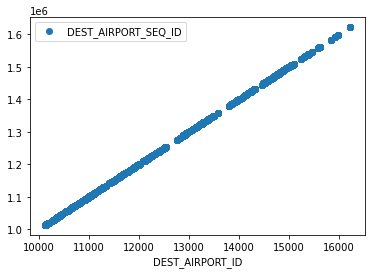

In [60]:
# 'DEST'	
print(is_columns_same('DEST','DEST_AIRPORT_SEQ_ID'))
print(is_columns_same('DEST','DEST_AIRPORT_ID'))


df.plot(x='DEST_AIRPORT_ID', y='DEST_AIRPORT_SEQ_ID', style='o');

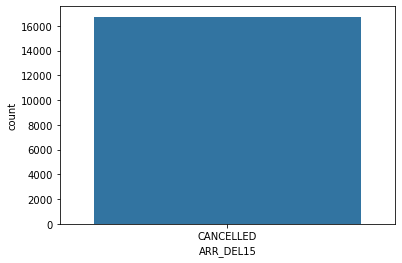

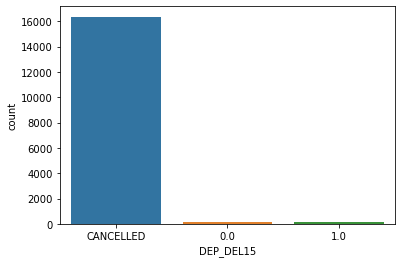

In [61]:
for i in ['ARR_DEL15', 'DEP_DEL15']:
    plt.figure()
    sns.countplot(x=i, data=df[df['CANCELLED']==1.0].fillna('CANCELLED'))

In [62]:
df.drop(columns=['Unnamed: 21',
                 'DEP_DEL15','ARR_DEL15',
                 'OP_UNIQUE_CARRIER', 'OP_CARRIER',
                 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
                 'DEST_AIRPORT_SEQ_ID', 'DEST'
                ],
        
        inplace=True)

According to this we decided to delete the identical columns leaving only one of them.

**'Unnamed: 21'** - all values are null

**'DEP_DEL15','ARR_DEL15'** - they're about flight delay but we predicting is flight cancelled or not

**'OP_UNIQUE_CARRIER', 'OP_CARRIER'** - same as OP_CARRIER_AIRLINE_ID

**'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN'** - same as ORIGIN_AIRPORT_ID

**'DEST_AIRPORT_SEQ_ID', 'DEST'** - same as DEST_AIRPORT_ID


Also we noticed that there are flights with the same departure and arrival time. They will only interfere with our further analyses so we decided to remove them too.

In [63]:
same_time = df[df.DEP_TIME==df.ARR_TIME].sort_values('DISTANCE', ascending=False)
same_time.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE
396886,22,2,19393,N710SW,1980,12896,12889,1727.0,1700-1759,1727.0,0.0,0.0,775.0
205085,11,5,19393,N7734H,1980,12896,12889,1746.0,1700-1759,1746.0,0.0,0.0,775.0
5940,1,2,19393,N242WN,1257,10279,12889,1549.0,1500-1559,1549.0,0.0,0.0,758.0
220646,12,6,19393,N7723E,2240,10279,12889,1313.0,1300-1359,1313.0,0.0,0.0,758.0
476258,26,6,19393,N708SW,5278,14107,14908,1945.0,1900-1959,1945.0,0.0,0.0,338.0


In [64]:
df.drop(same_time.index, axis=0, inplace=True)

## Data Transformation


According to the data, it is clear that the columns are not convenient to use over time and this set of numbers needs to be turned into time. That's why we created a function to convert data.

In [65]:
def change_date_time(col):
    minute = df[(df[col].notna())][col].apply(lambda x: str(int(x))[-2:]) 
    hours = df[(df[col].notna())][col].apply(lambda x: str(int(x))[:-2] if len(str(int(x))[:-2])>0 else '0')
    day = df['DAY_OF_MONTH'].copy()
    month = day.apply(lambda x: 1)
    for i in hours.index:
        if hours[i]=='24':
            day[i] += 1
            hours[i] = '0'
            
        if day[i] > 31:
            month[i] += 1
            day[i] = day[i]-31
        
    time = (hours + ':' + minute)
    date = day.apply(lambda x: str(x)) + '-' + month.apply(lambda x: str(x))+'-2019'
    
    datetime = date +' '+ time
    
    return pd.to_datetime(datetime, format='%d-%m-%Y %H:%M')

In [66]:
df['DEP_TIME'] = change_date_time('DEP_TIME')
df['ARR_TIME'] = change_date_time('ARR_TIME')

There is also missing values in this columns and we need to fill them. Firstly, we fill missing values grouping 'DEP_TIME' by 'DEP_TIME_BLK' using by their mode. Then filling missing values of 'ARR_TIME' using 'df.DEP_TIME' and 'DISTANCE' columns. Grouping 'TAIL_NUM' by ''DAY_OF_WEEK and filling missing values by mode of each week.

In [67]:
# Filling missing values

#  Grouping 'DEP_TIME' by 'DEP_TIME_BLK' and filling missing values by mode
df['DEP_TIME'] =  df[['DEP_TIME_BLK','DEP_TIME']].groupby('DEP_TIME_BLK').transform(lambda x: x.fillna(x.mode()[0]))

#  Filling missing values of 'ARR_TIME' using 'df.DEP_TIME' and 'DISTANCE' columns

v = df.DISTANCE.sum()/(((df['ARR_TIME']-df['DEP_TIME']).dt.total_seconds()).sum())
for i in df[df['ARR_TIME'].isna()].index:
    s = df['DISTANCE'].copy().loc[i]/v
    df['ARR_TIME'].loc[i] = df['DEP_TIME'].copy().loc[i]+timedelta(seconds=s)

# Grouping 'TAIL_NUM' by ''DAY_OF_WEEK and filling missing values by mode of each week
df['TAIL_NUM'] = df[['DAY_OF_WEEK','TAIL_NUM']].groupby('DAY_OF_WEEK').transform(lambda x: x.fillna( x.mode()[0] ))

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
unique_vals(df)

,col_name,number of unique values,unique values,dtype,Number_of_nan
10,CANCELLED,2,"[0.0, 1.0]",float64,0
11,DIVERTED,2,"[0.0, 1.0]",float64,0
1,DAY_OF_WEEK,7,"[2, 3, 4, 5, 6, 7, 1]",int64,0
2,OP_CARRIER_AIRLINE_ID,17,"[20363, 19805, 20398, 20368, 20397, 20409, 203...",int64,0
8,DEP_TIME_BLK,19,"[0600-0659, 1400-1459, 1200-1259, 1500-1559, 1...",object,0
0,DAY_OF_MONTH,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0
5,ORIGIN_AIRPORT_ID,346,"[11953, 13487, 11433, 15249, 10397, 11267, 124...",int64,0
6,DEST_AIRPORT_ID,346,"[10397, 11193, 11778, 13487, 12953, 10685, 112...",int64,0
12,DISTANCE,1451,"[300.0, 596.0, 229.0, 223.0, 579.0, 574.0, 341...",float64,0
3,TAIL_NUM,5446,"[N8688C, N348PQ, N8896A, N8886A, N8974C, N927E...",object,0


# Exploratory Data Analysis

Now check is there any null values after dropping unnecessary columns.

In [69]:
df['DEP_TIME'].isna().sum()

0

So we have 13 columns and about 583782 records.

In [70]:
df.shape

(583782, 13)

Then we use describe method to have information about the variables.

In [71]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CANCELLED,DIVERTED,DISTANCE
count,583782.000000,583782.000000,583782.000000,583782.000000,583782.000000,583782.000000,583782.000000,583782.000000,583782.000000
mean,15.960288,3.835603,19983.293478,2537.870195,12659.870340,12659.376836,0.028651,0.002220,797.934839
std,8.987856,1.921891,377.695423,1821.809003,1519.318196,1519.369798,0.166824,0.047065,590.009435
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,10135.000000,0.000000,0.000000,31.000000
25%,8.000000,2.000000,19790.000000,978.000000,11292.000000,11292.000000,0.000000,0.000000,363.000000
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,12889.000000,0.000000,0.000000,640.000000
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,13931.000000,0.000000,0.000000,1037.000000
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,16218.000000,1.000000,1.000000,4983.000000


First, we selected the 'ARR_DEL15' column as a target to find out whether the flight was delayed or not. The data ratio was 78 to 18. There were also missing data. According to the data, it was clear that if the plane took off with a delay, then, accordingly, it will arrive at the designated point with a delay. Because of this, we chose the more unbalanced 'CANCELLED' column as the target.

In [23]:
df['CANCELLED'].value_counts()

0.0    567056
1.0     16726
Name: CANCELLED, dtype: int64

In [24]:
df['CANCELLED'].value_counts()/len(df)

0.0    0.971349
1.0    0.028651
Name: CANCELLED, dtype: float64

  Here the data imbalance is 97 to 3.

<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

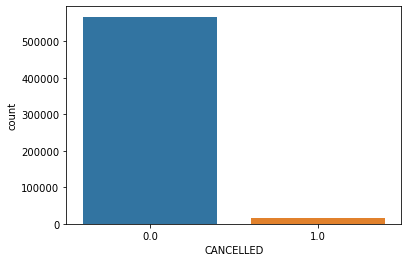

In [25]:
sns.countplot(x="CANCELLED", data=df)

Plotting heat map to understand the correlation of variables .

Text(0.5, 1.0, 'Correlation of variables')

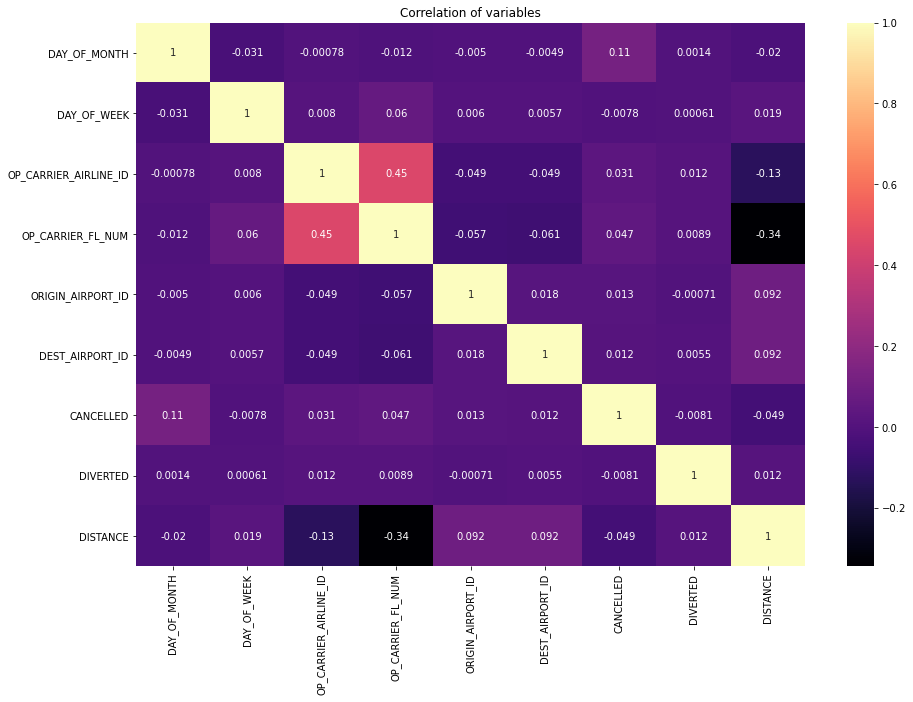

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
ax.set_title("Correlation of variables")

Encoding for Column DEST

We assume DEST is the departure city. Then  we plot a histogram of Flight Cancellations based on Destination Airport.

Text(0.5, 1.0, 'Histogram of Flight Delays based on Destination Airport')

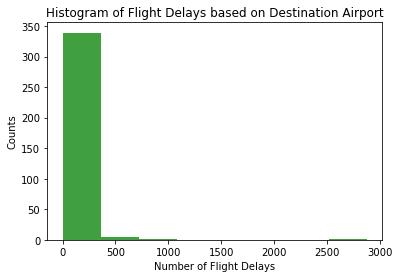

In [27]:
column = 'DEST_AIRPORT_ID'
df2 = df[[column, 'CANCELLED']]
df2 = df2.groupby(column).sum()
df2 = df2.sort_values(by=['CANCELLED'], ascending=False)
df2.columns = ['city_delay']

##plt.boxplot(df2['delay_counts'], notch=True)
plt.hist(df2['city_delay'], 8, facecolor='green', alpha=0.75)
plt.xlabel('Number of Flight Delays')
plt.ylabel('Counts')
plt.title(r'Histogram of Flight Delays based on Destination Airport')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


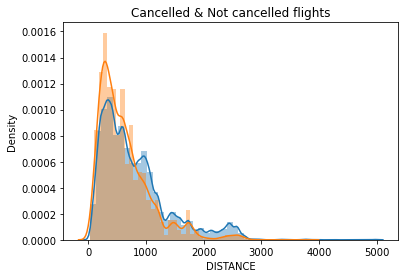

In [28]:
sns.distplot(df[df.CANCELLED==0.0].DISTANCE, hist=True);
sns.distplot(df[df.CANCELLED==1.0].DISTANCE, hist=True);
# cancelled orange
# not cancelled blue
plt.title("Cancelled & Not cancelled flights");

We elec to plot a distplot to see how much the cancellation of a flight depends on the distance it flies.

So from this we conclude that most of the canceled flights were for a shorter distance.

Also we decided plot displots to see where the most flight cancellations came from. From Origin airport or destination airport.

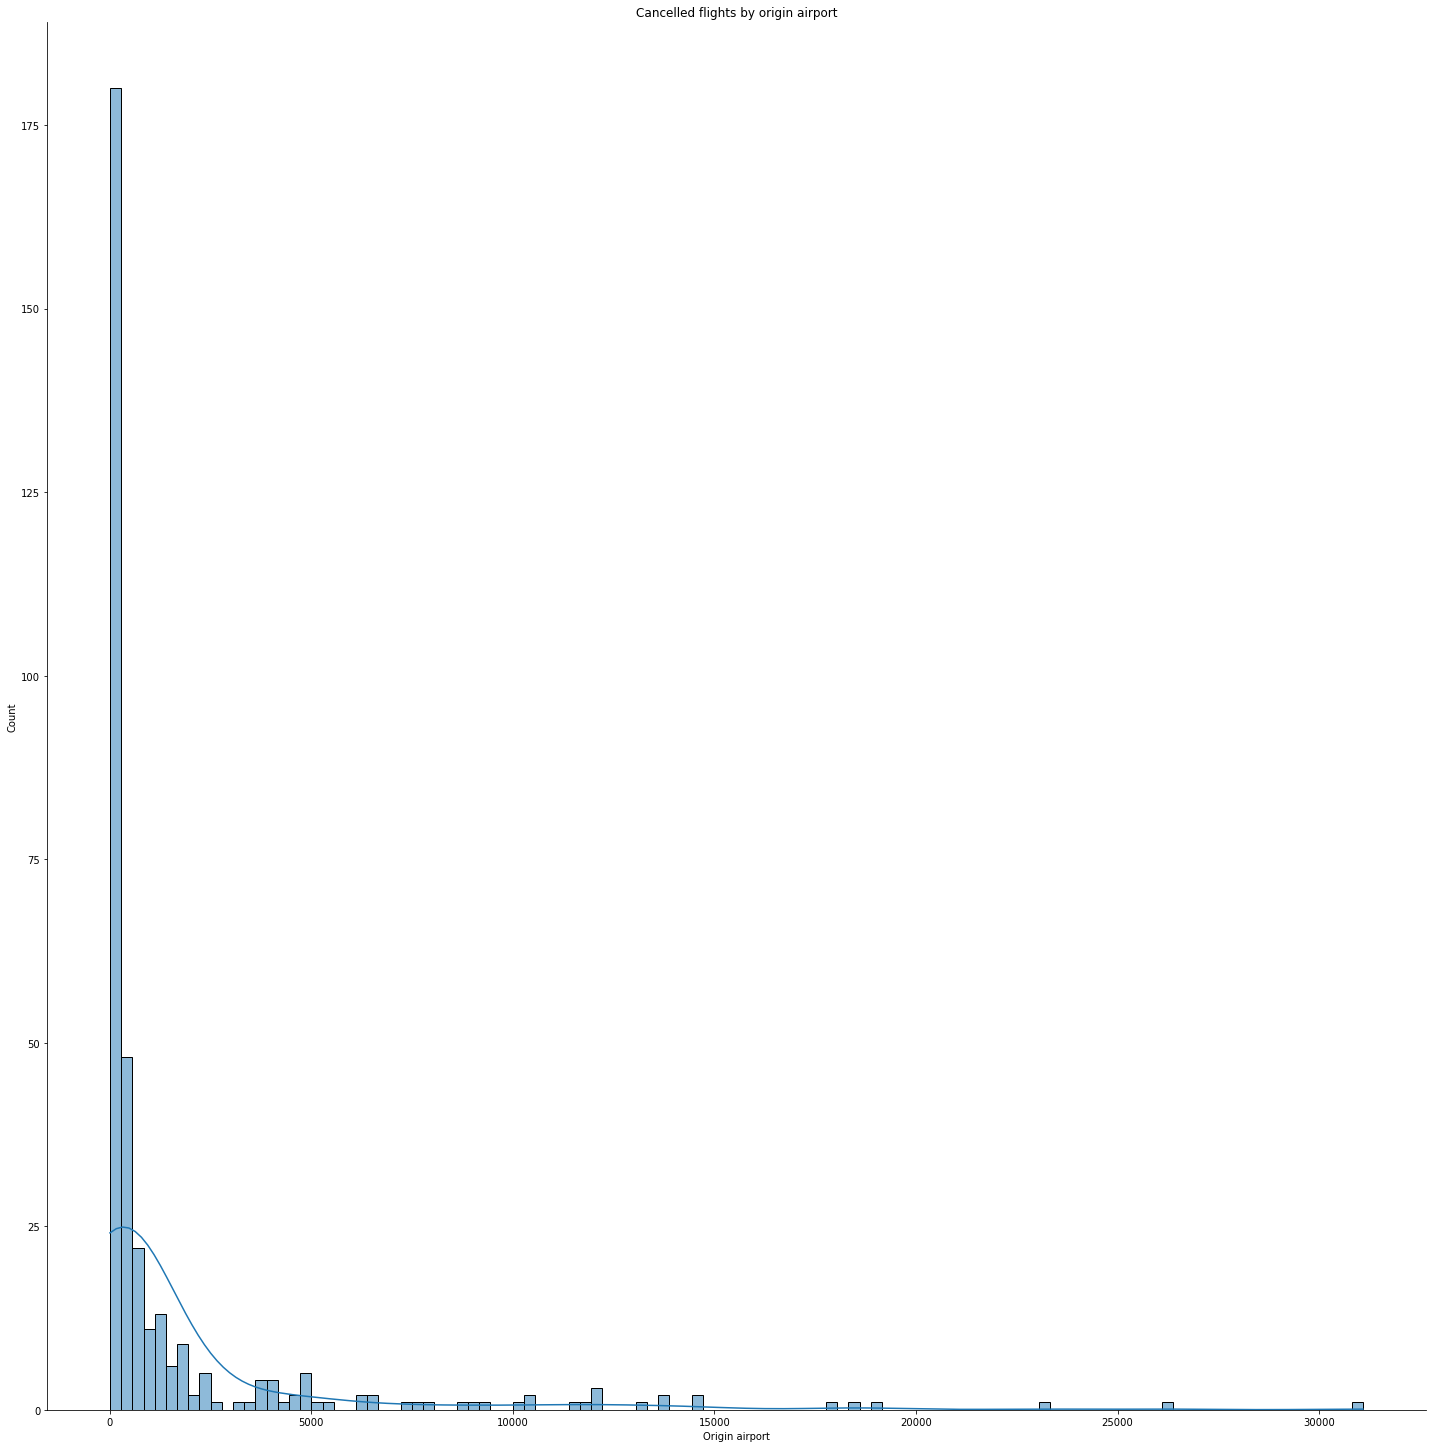

In [29]:
plot3 = df.groupby('ORIGIN_AIRPORT_ID')['CANCELLED'].count().sort_values(ascending=False)
fig = sns.displot(data=plot3, kde=True, height=20);

plt.title("Cancelled flights by origin airport");
plt.xlabel("Origin airport");
plt.ylabel("Count");

In [30]:
df4 = pd.read_csv('Jan_2019_ontime.csv')
df4.groupby('ORIGIN')['CANCELLED'].count().sort_values(ascending=False)

ORIGIN
ATL    31155
ORD    26216
DFW    23063
CLT    19100
DEN    18507
       ...  
PPG       11
HGR       10
OWB        9
ADK        9
OGD        8
Name: CANCELLED, Length: 346, dtype: int64

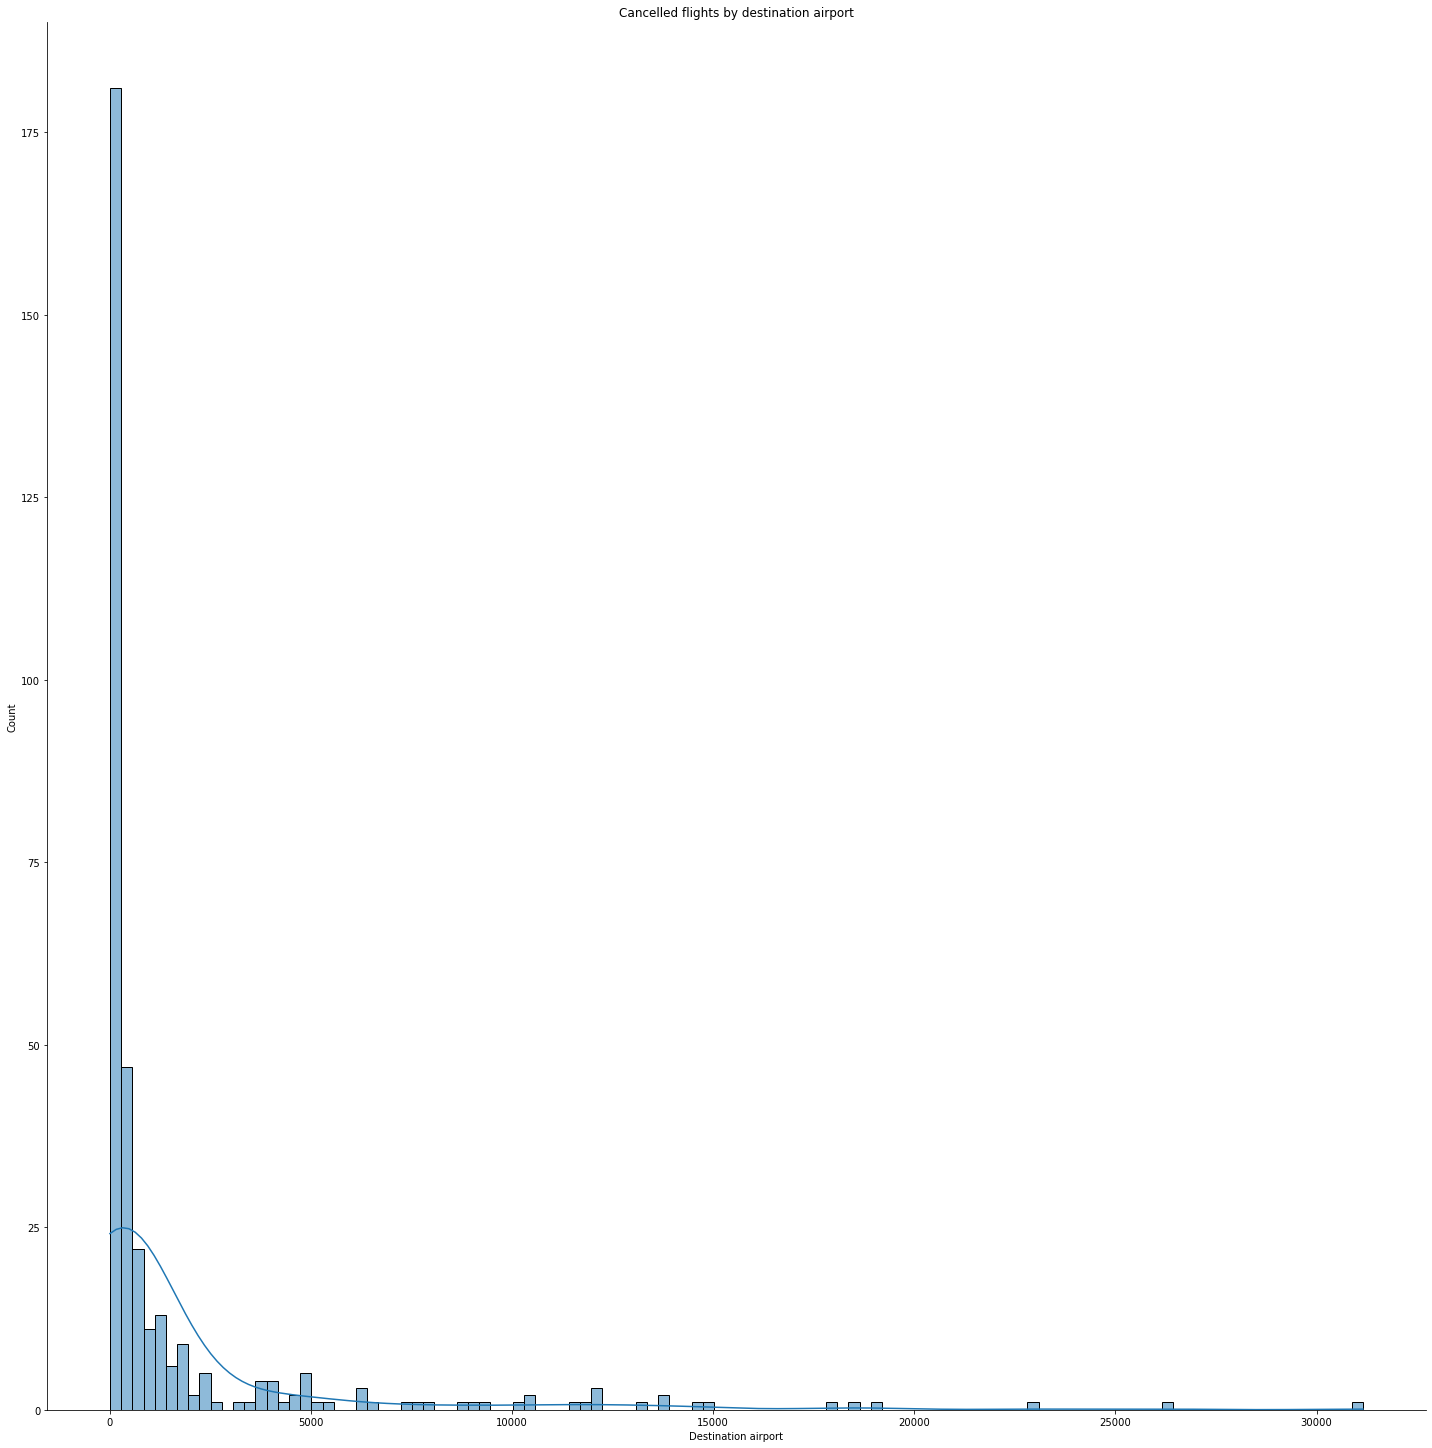

In [31]:
plot4 = df.groupby('DEST_AIRPORT_ID')['CANCELLED'].count().sort_values(ascending=False);
fig = sns.displot(plot4, kde=True, height=20);

plt.title("Cancelled flights by destination airport");
plt.xlabel("Destination airport");
plt.ylabel("Count");

In [32]:
df4.groupby('DEST')['CANCELLED'].count().sort_values(ascending=False)

DEST
ATL    31151
ORD    26212
DFW    23078
CLT    19105
DEN    18498
       ...  
OGS       11
HGR       10
ADK        9
OWB        9
OGD        8
Name: CANCELLED, Length: 346, dtype: int64

We see that displots are identical. Because cancellation of flight written from like both sides (cancelled in origin and destination airport) in the dataset. And from both sides mostly cancelled flights are from airport ATL. 

After looking at the regions affected by tornados, ALT and CLT i.e airports with most cancelled flights lie within high risk region of tornados. The case of delayed/cancelled flights and be explained due to a storm occurrence in san francisco on 16th Jan, 2019. Also this airports with most cancelled/delayed flights are amongst most busiest in USA.

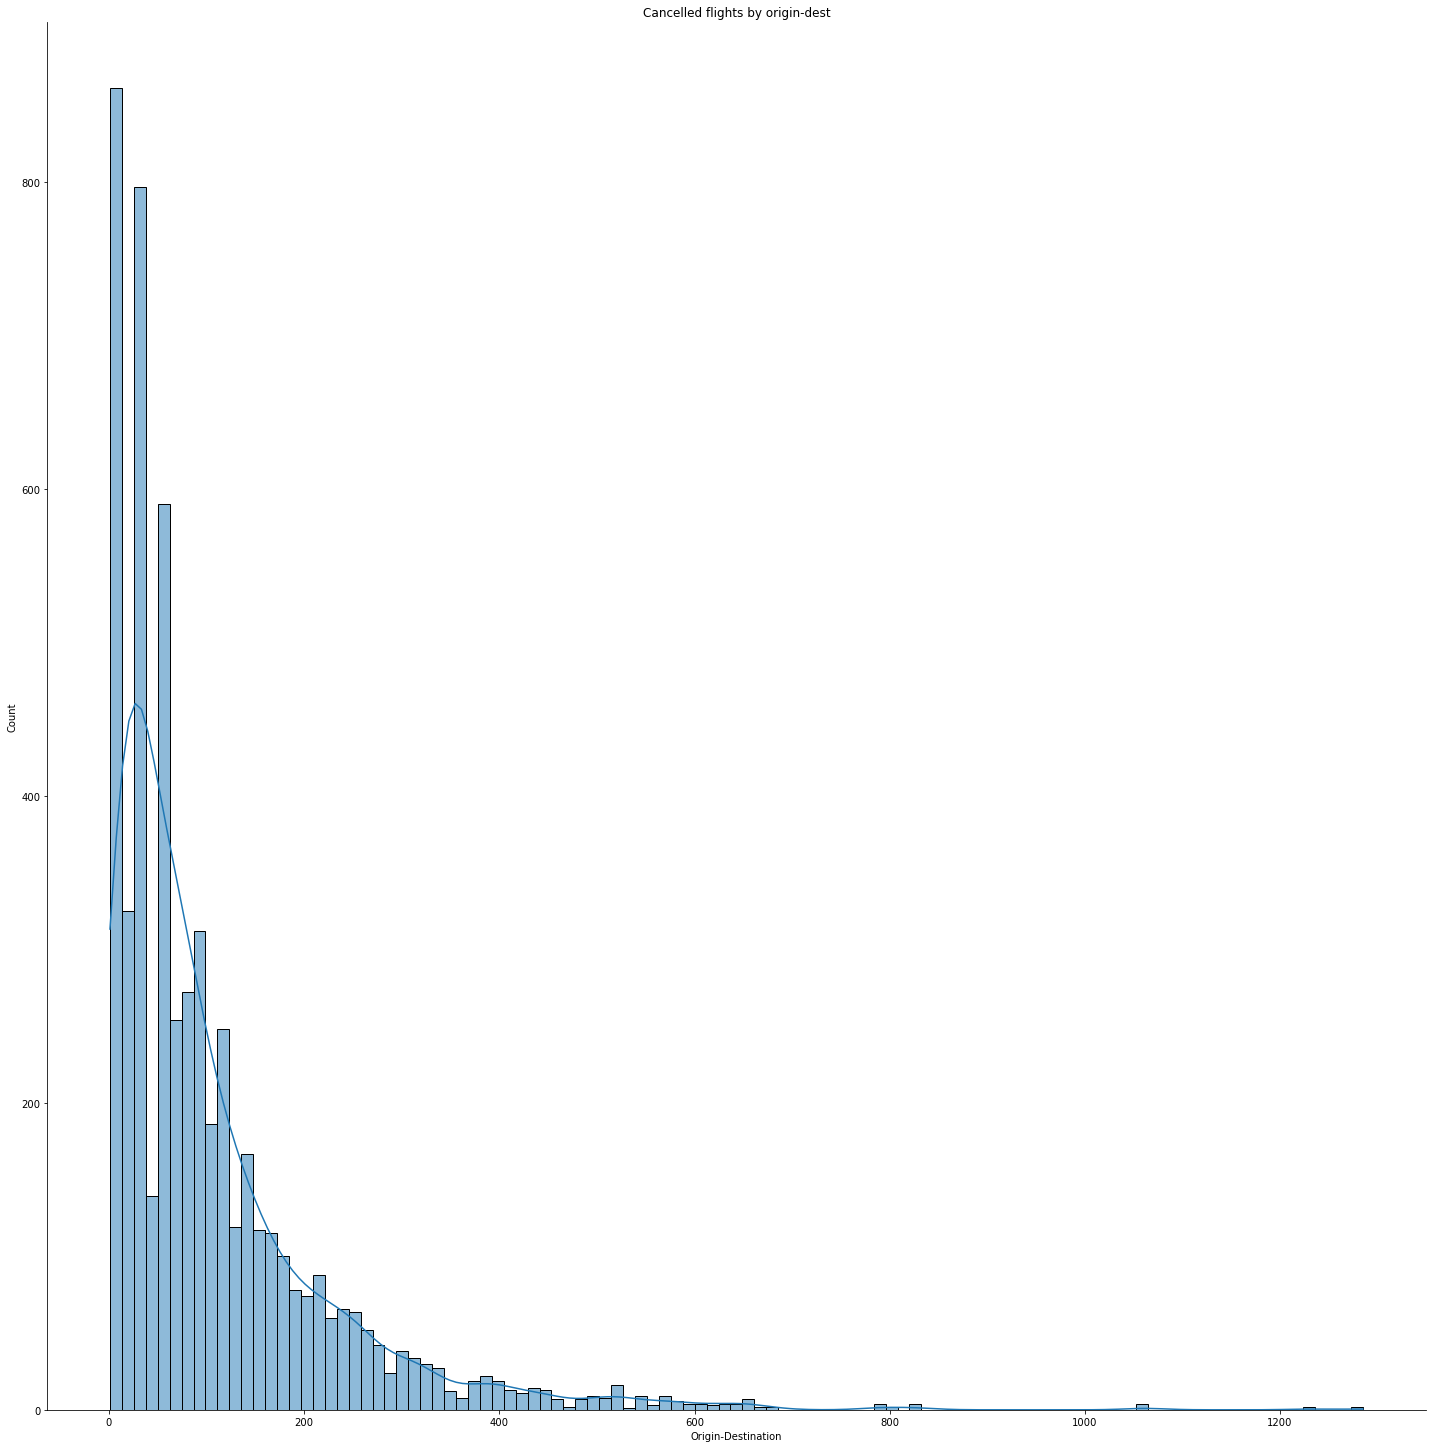

In [33]:
plot5 = df.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])['CANCELLED'].count().sort_values(ascending=False)
fig = sns.displot(data=plot5, kde=True, height=20);

plt.title("Cancelled flights by origin-dest");
plt.xlabel("Origin-Destination");
plt.ylabel("Count");

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

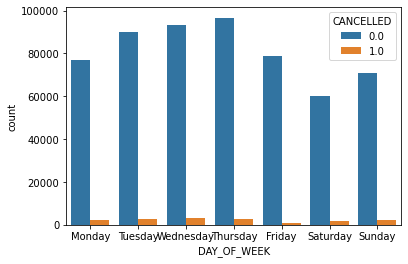

In [34]:
days = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
dayorder = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
df3 = df.replace({'DAY_OF_WEEK':days})
sns.countplot(x="DAY_OF_WEEK",data=df3,hue='CANCELLED', order=dayorder)

We choose to plot countplots to see in which day of week most cancelled and not cancelled flights. From this countplot we decided that number of cancelled flights in each day of week approximately the same but on Friday, the least number of canceled flights.  

In [35]:
df_week = df3.groupby('DAY_OF_WEEK')['CANCELLED'].describe()
df_week

,count,mean,std,min,25%,50%,75%,max
DAY_OF_WEEK,,,,,,,,
Friday,79665.0,0.011247,0.105455,0.0,0.0,0.0,0.0,1.0
Monday,79375.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
Saturday,62305.0,0.032806,0.178131,0.0,0.0,0.0,0.0,1.0
Sunday,73430.0,0.032602,0.177595,0.0,0.0,0.0,0.0,1.0
Thursday,99359.0,0.027295,0.162942,0.0,0.0,0.0,0.0,1.0
Tuesday,92764.0,0.030993,0.173299,0.0,0.0,0.0,0.0,1.0
Wednesday,96884.0,0.035011,0.183808,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='DAY_OF_MONTH', ylabel='count'>

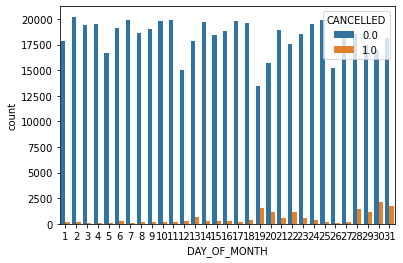

In [36]:
sns.countplot(x="DAY_OF_MONTH", data=df, hue='CANCELLED')

Also we elect to plot a countplot to see in which day of month most cancelled and not cancelled flights. from this countplot, we can conclude that until the middle of the month everything goes about the same, we also see that at 19, 20, 22, and at the end of the month a large number of canceled flights compared to the beginning of the month.

# Feature engineering

In [37]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,N8688C,3280,11953,10397,2019-01-01 06:01:00,0600-0659,2019-01-01 07:22:00,0.0,0.0,300.0
1,1,2,20363,N348PQ,3281,13487,11193,2019-01-01 13:59:00,1400-1459,2019-01-01 16:33:00,0.0,0.0,596.0
2,1,2,20363,N8896A,3282,11433,11193,2019-01-01 12:15:00,1200-1259,2019-01-01 13:29:00,0.0,0.0,229.0
3,1,2,20363,N8886A,3283,15249,10397,2019-01-01 15:21:00,1500-1559,2019-01-01 16:25:00,0.0,0.0,223.0
4,1,2,20363,N8974C,3284,10397,11778,2019-01-01 18:47:00,1900-1959,2019-01-01 19:40:00,0.0,0.0,579.0


Analyzing the data, we realized that in order to assume the cancellation of the flight, we need to create variables ARR_TIME_BLOCK and a variable of the number of cancellations within DEP_TIME_BLK and ARR_TIME_BLOCK

In [38]:
# create ARR_TIME_BLOCK
df['ARR_TIME_BLK'] = df['ARR_TIME'].apply(lambda x: str(x.hour)+'00-'+str(x.hour)+'59')

In [39]:
# The number of cancels within a DEP_TIME_BLK.
count_time_blk = df[['DEP_TIME_BLK','CANCELLED']].groupby('DEP_TIME_BLK').sum().sort_values(by='CANCELLED',ascending=False).rename({'CANCELLED':'count_time_dept'}, axis=1)
df = df.merge(count_time_blk, left_on='DEP_TIME_BLK', right_on='DEP_TIME_BLK')

In [40]:
# The number of cancels within a ARR_TIME_BLK.
count_time_blk = df[['ARR_TIME_BLK','CANCELLED']].groupby('ARR_TIME_BLK').sum().sort_values(by='CANCELLED',ascending=False).rename({'CANCELLED':'count_time_arr'}, axis=1)
df = df.merge(count_time_blk, left_on='ARR_TIME_BLK', right_on='ARR_TIME_BLK')

In [41]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK,count_time_dept,count_time_arr
0,1,2,20363,N8688C,3280,11953,10397,2019-01-01 06:01:00,0600-0659,2019-01-01 07:22:00,0.0,0.0,300.0,700-759,1300.0,1057.0
1,1,2,20363,N931XJ,3290,10874,10397,2019-01-01 05:57:00,0600-0659,2019-01-01 07:37:00,0.0,0.0,528.0,700-759,1300.0,1057.0
2,1,2,20363,N153PQ,3349,10208,10397,2019-01-01 06:01:00,0600-0659,2019-01-01 07:04:00,0.0,0.0,143.0,700-759,1300.0,1057.0
3,1,2,20363,N601LR,3360,11203,13487,2019-01-01 06:51:00,0600-0659,2019-01-01 07:43:00,0.0,0.0,175.0,700-759,1300.0,1057.0
4,1,2,20363,N398CA,3380,14098,10397,2019-01-01 05:50:00,0600-0659,2019-01-01 07:57:00,0.0,0.0,508.0,700-759,1300.0,1057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583777,30,3,19805,N756US,585,14107,11433,2019-01-30 23:16:00,2300-2359,2019-01-30 04:57:00,0.0,0.0,1671.0,400-459,40.0,15.0
583778,30,3,19930,N284AK,601,12892,10299,2019-01-30 23:52:00,2300-2359,2019-01-30 04:19:00,0.0,0.0,2345.0,400-459,40.0,15.0
583779,31,4,20409,N779JB,994,11292,10721,2019-01-31 23:09:00,2300-2359,2019-01-31 04:44:00,0.0,0.0,1754.0,400-459,40.0,15.0
583780,31,4,20409,N975JB,1503,12478,14843,2019-01-31 23:03:00,2300-2359,2019-01-31 04:05:00,0.0,0.0,1598.0,400-459,40.0,15.0


In [42]:
df['DEP_TIME'] = df['DEP_TIME'].map(datetime.datetime.toordinal)
df['ARR_TIME'] = df['ARR_TIME'].map(datetime.datetime.toordinal)

# Feature Selection

In [43]:
unique_vals(df)

,col_name,number of unique values,unique values,dtype,Number_of_nan
10,CANCELLED,2,"[0.0, 1.0]",float64,0
11,DIVERTED,2,"[0.0, 1.0]",float64,0
1,DAY_OF_WEEK,7,"[2, 3, 4, 5, 6, 7, 1]",int64,0
2,OP_CARRIER_AIRLINE_ID,17,"[20363, 19805, 20398, 20397, 20409, 20378, 203...",int64,0
8,DEP_TIME_BLK,19,"[0600-0659, 1200-1259, 1900-1959, 1000-1059, 2...",object,0
14,count_time_dept,19,"[1300.0, 973.0, 993.0, 1051.0, 816.0, 829.0, 8...",float64,0
13,ARR_TIME_BLK,24,"[700-759, 800-859, 900-959, 1500-1559, 1000-10...",object,0
15,count_time_arr,24,"[1057.0, 747.0, 800.0, 968.0, 782.0, 972.0, 11...",float64,0
0,DAY_OF_MONTH,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0
7,DEP_TIME,32,"[737060, 737073, 737061, 737062, 737063, 73706...",int64,0


Then we chose these columns for numeric and categorical in order to use them for feature in the future

In [44]:
numerical = ['OP_CARRIER_AIRLINE_ID', 'count_time_dept', 'count_time_arr', 
             'DAY_OF_MONTH',
            'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE',
            'OP_CARRIER_FL_NUM']

categorical = ['DIVERTED', 'DAY_OF_WEEK','DEP_TIME_BLK', 
               'ARR_TIME_BLK', 'TAIL_NUM']

In [45]:
scaler = StandardScaler()
# Standardize features
df[numerical] = scaler.fit_transform(df[numerical] )

#The code below shows that the numerical columns have minimum skewness.
df[numerical].skew(axis=0)

OP_CARRIER_AIRLINE_ID   -0.266519
count_time_dept         -1.128164
count_time_arr          -1.922178
DAY_OF_MONTH             0.013737
ORIGIN_AIRPORT_ID        0.088260
DEST_AIRPORT_ID          0.088466
DISTANCE                 1.488845
OP_CARRIER_FL_NUM        0.541315
dtype: float64

We factorize all categorical objects.

In [46]:
for i in categorical:
    if df[i].dtype == "object":
        print(i)
        df[i] = df[i].factorize()[0]

DEP_TIME_BLK
ARR_TIME_BLK
TAIL_NUM


So this is our all features.

In [47]:
features = [*numerical, *categorical]
features

['OP_CARRIER_AIRLINE_ID',
 'count_time_dept',
 'count_time_arr',
 'DAY_OF_MONTH',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'DISTANCE',
 'OP_CARRIER_FL_NUM',
 'DIVERTED',
 'DAY_OF_WEEK',
 'DEP_TIME_BLK',
 'ARR_TIME_BLK',
 'TAIL_NUM']

# ML

As relatively few flights are cancelled, a classifier that simply predicts that no flights will be cancelled could achieve high error rates. Thus, our main challenge was to instead improve recall, the percentage of cancelled flights that we correctly classified as cancelled. Companies in industry that work in flight delay prediction report similar numbers for testing accuracy and precision, but their recall is higher roughly around 60%. ***These companies also cite improving recall as their biggest concern.***

Type 1 error when we say that the flight will be canceled(1), but it is not actually canceled(0). 
***Type 2 error*** when we say that there will be a flight(0), but it will not actually be(1). It will be bad for the airline and avia companies that they will say that the plane will fly, but in fact it will not fly. That is, we should have less ***FN***. And if we have less FN, then the importance of the ***recall*** increases. 

This means that in place F1 we need to take into account ***F2***, where the recall has a higher weight than precision

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance. The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

Thus, ***Precision-Recall*** curves are more important than ROC curves in case of imbalance.

In [33]:
y = df[['CANCELLED']]
X = df[features]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=777)

In [35]:
# Create confusion matrix
def conf_matrix(y_test,  y_pred):
    conf_m = pd.DataFrame(confusion_matrix(y_test,  y_pred), 
                               columns=[" Predicted NO", " Predicted YES"],
                               index=[" Actual NO", " Actual YES"])
    return conf_m

## Logistic Regression

1. Standard logistic regression
2. Weighted logistic regression(‘balanced’)
3. Weighted logistic regression(manual weights)
4. Random Undersampling <br>
    Grid Search for Logistic regression With Random Undersampling

5.  Random Oversampling<br>
     Grid Search for Logistic regression With Random Oversampling
    
6. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).<br>
    Grid Search for Logistic regression With SMOTEEN

### 1. Standard Logistic Regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              Predicted NO   Predicted YES
 Actual NO          141720               0
 Actual YES           4226               0
____________________________________________



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    141720
         1.0       0.00      0.00      0.00      4226

    accuracy                           0.97    145946
   macro avg       0.49      0.50      0.49    145946
weighted avg       0.94      0.97      0.96    145946

F2 score: 0.0


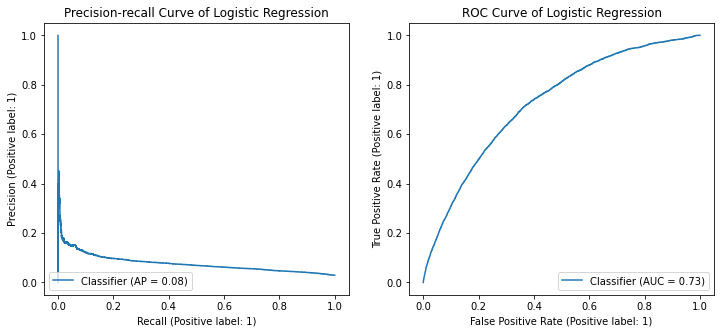

In [468]:
clf = skl_lm.LogisticRegression( )
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test)                       

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');


m = ['Standard logistic regression']
p_auc = [pr_auc_lr]
r_auc = [roc_auc_lr]
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2 = [f2_lr]

https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

### 2. Weighted logistic regression(‘balanced’)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              Predicted NO   Predicted YES
 Actual NO           92654           49066
 Actual YES           1242            2984
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79    141720
         1.0       0.06      0.71      0.11      4226

    accuracy                           0.66    145946
   macro avg       0.52      0.68      0.45    145946
weighted avg       0.96      0.66      0.77    145946

F2 score: 0.21637613481451404


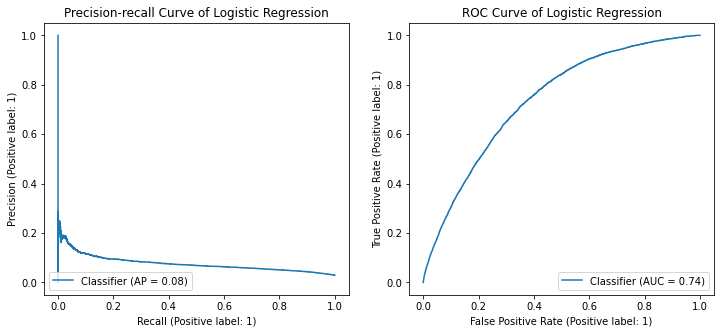

In [469]:
clf = skl_lm.LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');


m.append('Weighted logistic regression(‘balanced’)')
p_auc.append(pr_auc_lr)
r_auc.append(roc_auc_lr)
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2.append(f2_lr)

### 3. Weighted logistic regression(manual weights)

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [429]:
lr = skl_lm.LogisticRegression()

# Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = { 
                'class_weight': [{0:x, 1:1.0-x} for x in weights], 
             }

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2)


In [431]:
gs = gridsearch.fit(X_train, y_train.values.ravel())
gs.best_params_

{'class_weight': {0: 0.024874371859296484, 1: 0.9751256281407035}}

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              Predicted NO   Predicted YES
 Actual NO           85603           56117
 Actual YES           1030            3196
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75    141720
         1.0       0.05      0.76      0.10      4226

    accuracy                           0.61    145946
   macro avg       0.52      0.68      0.43    145946
weighted avg       0.96      0.61      0.73    145946

F2 score: 0.20966451054226748


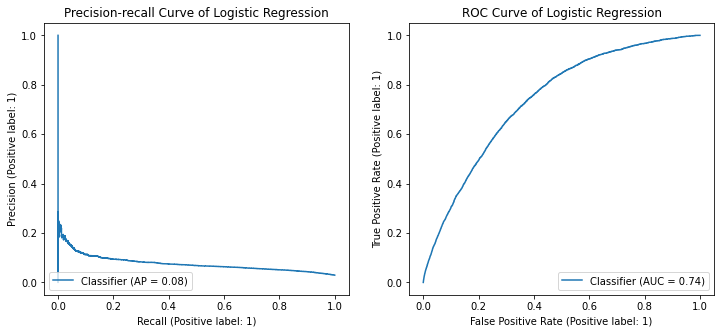

In [470]:
clf = skl_lm.LogisticRegression(class_weight={0: 0.024874371859296484, 1: 0.9751256281407035})
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');


m.append('Weighted logistic regression(manual weights)')
p_auc.append(pr_auc_lr)
r_auc.append(roc_auc_lr)
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2.append(f2_lr)


### 4. Random Undersampling
 Grid Search for Logistic regression With Random Undersampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority")
X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus.value_counts()

CANCELLED
0.0          12500
1.0          12500
dtype: int64

In [45]:
lr = skl_lm.LogisticRegression()

#Creating a dictionary grid for grid search
param_grid = { 
              'solver':['newton-cg', 'lbfgs','liblinear'],
               'penalty':[ 'l1', 'l2'], # l1 lasso l2 ridge
               'C': np.logspace(-3,3,7),
                'max_iter':[300,350,400,450]
             }

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2)


In [435]:
gs_rus = gridsearch.fit(X_rus, y_rus.values.ravel()) 
gs_rus.best_params_

{'C': 10.0, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}

              Predicted NO   Predicted YES
 Actual NO           92783           48937
 Actual YES           1235            2991
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79    141720
         1.0       0.06      0.71      0.11      4226

    accuracy                           0.66    145946
   macro avg       0.52      0.68      0.45    145946
weighted avg       0.96      0.66      0.77    145946

F2 score: 0.2172681311018131


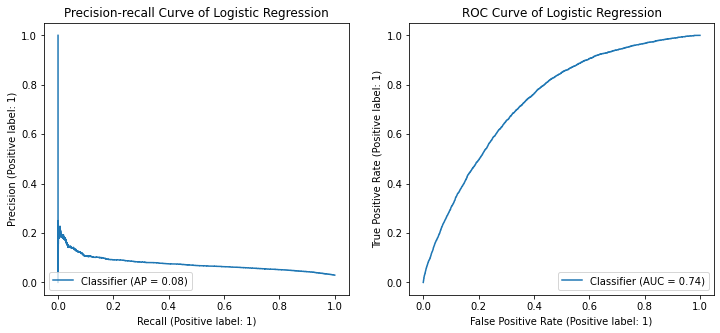

In [471]:
clf = skl_lm.LogisticRegression(C=10.0, max_iter=400, penalty='l1', solver ='liblinear')
clf.fit(X_rus, y_rus.values.ravel()) 

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');

m.append('Random Undersampling')
p_auc.append(pr_auc_lr)
r_auc.append(roc_auc_lr)
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2.append(f2_lr)


### 5.  Random Oversampling
Grid Search for Logistic regression With Random Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(X_train, y_train)

y_ros.value_counts()

CANCELLED
0.0          425336
1.0          425336
dtype: int64

In [47]:
gs_ros = gridsearch.fit(X_ros, y_ros.values.ravel()) 
gs_ros.best_params_

{'C': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}

              Predicted NO   Predicted YES
 Actual NO           92802           48918
 Actual YES           1243            2983
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79    141720
         1.0       0.06      0.71      0.11      4226

    accuracy                           0.66    145946
   macro avg       0.52      0.68      0.45    145946
weighted avg       0.96      0.66      0.77    145946

F2 score: 0.2167720369159218


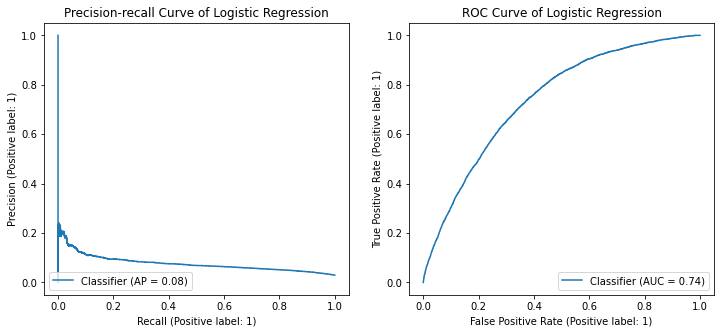

In [472]:
clf = skl_lm.LogisticRegression(max_iter=300, C=0.1, penalty='l1', solver='liblinear')
clf.fit(X_ros, y_ros.values.ravel()) 

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');


m.append('Random Oversampling')
p_auc.append(pr_auc_lr)
r_auc.append(roc_auc_lr)
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2.append(f2_lr)

### 6. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).
Grid Search for Logistic regression With SMOTEEN

In [60]:
from imblearn.combine import SMOTEENN 

combine = SMOTEENN (sampling_strategy=1)
X_smteen, y_smteen = combine.fit_sample(X_train, y_train)

y_smteen.value_counts()

CANCELLED
1.0          422384
0.0          357454
dtype: int64

In [92]:
gs_smteen = gridsearch.fit(X_smteen, y_smteen.values.ravel()) 
gs_smteen.best_params_

{'C': 1.0, 'max_iter': 400, 'penalty': 'l2', 'solver': 'liblinear'}

              Predicted NO   Predicted YES
 Actual NO           86135           55585
 Actual YES           1105            3121
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75    141720
         1.0       0.05      0.74      0.10      4226

    accuracy                           0.61    145946
   macro avg       0.52      0.67      0.43    145946
weighted avg       0.96      0.61      0.73    145946

F2 score: 0.20638804390953577


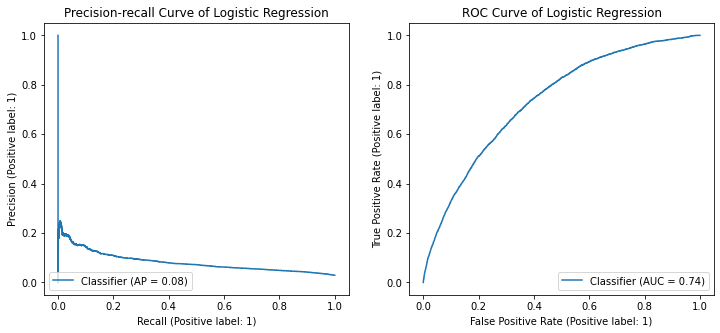

In [473]:
clf = skl_lm.LogisticRegression(max_iter=400, C=1.0, penalty='l2', solver='liblinear')
clf.fit(X_smteen, y_smteen.values.ravel()) 

# Predict values for the testing data.
y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');


m.append('SMOTEEN')
p_auc.append(pr_auc_lr)
r_auc.append(roc_auc_lr)
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)
f2.append(f2_lr)

In [474]:
p_auc = [ '%0.3f' % i for i in p_auc]
r_auc = [ '%0.3f' % i for i in r_auc]
f2 = [ '%0.3f' % i for i in f2]
pd.DataFrame([p_auc, r_auc, f2], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=m)

,Standard logistic regression,Weighted logistic regression(‘balanced’),Weighted logistic regression(manual weights),Random Undersampling,Random Oversampling,SMOTEEN
Precision-Recall AUC,0.077,0.076,0.076,0.075,0.077,0.082
ROC AUC,0.728,0.739,0.740,0.741,0.741,0.737
F2,0.000,0.216,0.210,0.217,0.217,0.206


based on these results, it can be decided that ***SMOTEEN*** performs better than others.

## kNN

1. Standard kNN
2. Grid Search Cross Validation
3. Grid Search for kNN With Random Undersampling
4. Grid Search for kNN With Random Oversampling
5. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).

### 1. Standard kNN

              Predicted NO   Predicted YES
 Actual NO          141493             227
 Actual YES           3623             603
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.73      0.14      0.24      4226

    accuracy                           0.97    145946
   macro avg       0.85      0.57      0.61    145946
weighted avg       0.97      0.97      0.96    145946

F2 score: 0.17001240554866356


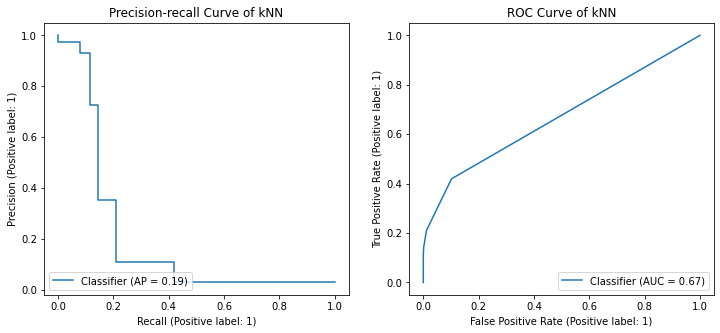

In [482]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel());

y_pred = knn.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = knn.predict_proba(X_test)

fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)                      

pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_knn = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of kNN');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of kNN');

m = ['Standard kNN']
p_auc = [pr_auc_knn]
r_auc = [roc_auc_knn]
f2_knn = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_knn)
f2 = [f2_knn]

### 2. Grid Search Cross Validation

In [211]:
knn_grid = KNeighborsClassifier()
k_range = list(range(1, 50, 2))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn_grid, param_grid, cv=5, scoring='recall', verbose=1)
  

In [188]:
# fitting the model for grid search
grid_search_knn = grid.fit(X_train, y_train.values.ravel())
grid_search_knn.best_params_

{'n_neighbors': 3}

              Predicted NO   Predicted YES
 Actual NO          141127             593
 Actual YES           3525             701
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.54      0.17      0.25      4226

    accuracy                           0.97    145946
   macro avg       0.76      0.58      0.62    145946
weighted avg       0.96      0.97      0.96    145946

F2 score: 0.19260358281129794


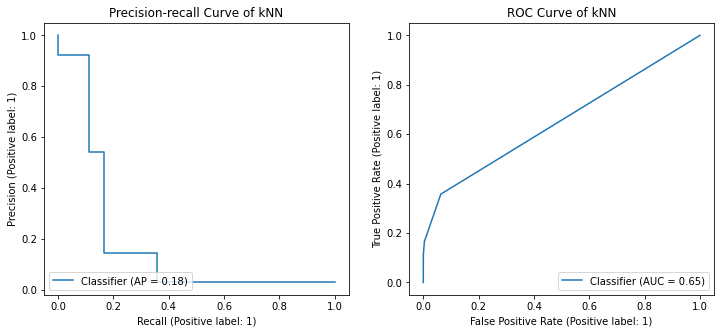

In [483]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.values.ravel());

y_pred = knn.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = knn.predict_proba(X_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_knn = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of kNN');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of kNN');

m.append('Grid Search Cross Validation')
p_auc.append(pr_auc_knn)
r_auc.append(roc_auc_knn)
f2_knn = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_knn)
f2.append(f2_knn)

### 3. Grid Search for kNN With Random Undersampling

In [212]:
grid_search = grid.fit(X_rus, y_rus.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [213]:
grid_search.best_params_

{'n_neighbors': 1}

              Predicted NO   Predicted YES
 Actual NO           86687           55033
 Actual YES           1378            2848
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75    141720
         1.0       0.05      0.67      0.09      4226

    accuracy                           0.61    145946
   macro avg       0.52      0.64      0.42    145946
weighted avg       0.96      0.61      0.74    145946

F2 score: 0.19041251587885272


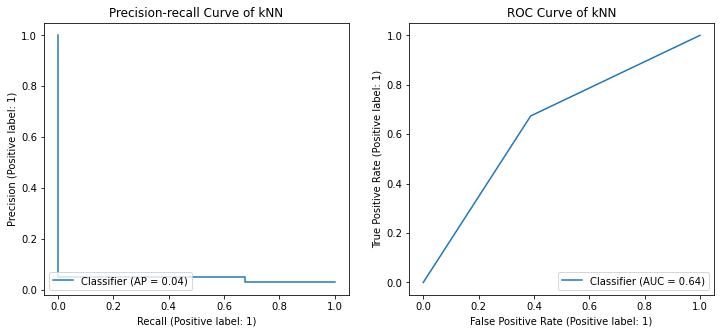

In [484]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_rus, y_rus.values.ravel()) 

y_pred = knn.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = knn.predict_proba(X_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_knn = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of kNN');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of kNN');

m.append('Random Undersampling')
p_auc.append(pr_auc_knn)
r_auc.append(roc_auc_knn)
f2_knn = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_knn)
f2.append(f2_knn)

### 4. Grid Search for kNN With Random Oversampling

In [217]:
grid_search = grid.fit(X_ros, y_ros.values.ravel())
# grid_search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [223]:
grid_search.best_params_

{'n_neighbors': 11}

              Predicted NO   Predicted YES
 Actual NO          138664            3056
 Actual YES           3179            1047
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    141720
         1.0       0.26      0.25      0.25      4226

    accuracy                           0.96    145946
   macro avg       0.62      0.61      0.61    145946
weighted avg       0.96      0.96      0.96    145946

F2 score: 0.24920264673680204


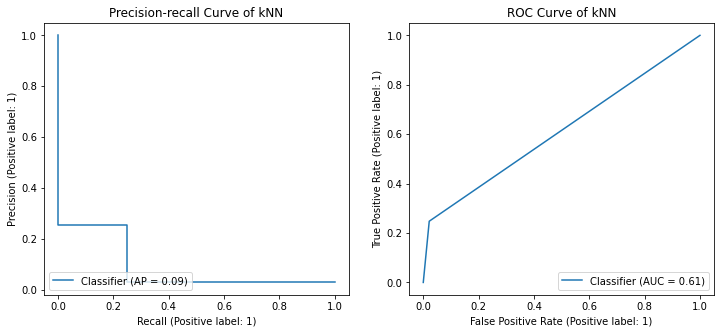

In [486]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_ros, y_ros.values.ravel()) 

y_pred = knn.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = knn.predict_proba(X_test)

fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_knn = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of kNN');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of kNN');

m.append('Random Oversampling')
p_auc.append(pr_auc_knn)
r_auc.append(roc_auc_knn)
f2_knn = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_knn)
f2.append(f2_knn)

### 5. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).

In [244]:
grid_search = grid.fit(X_smteen, y_smteen.values.ravel())
grid_search.best_params_

{'n_neighbors': 13}

              Predicted NO   Predicted YES
 Actual NO          111976           29744
 Actual YES           1862            2364
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88    141720
         1.0       0.07      0.56      0.13      4226

    accuracy                           0.78    145946
   macro avg       0.53      0.67      0.50    145946
weighted avg       0.96      0.78      0.85    145946

F2 score: 0.24116542887456133


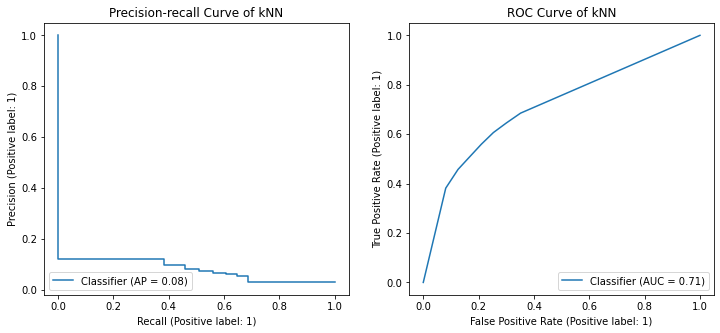

In [487]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_smteen, y_smteen.values.ravel()) 

# Predict values for the testing data.
y_pred = knn.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = knn.predict_proba(X_test)

fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

pre_knn, rec_knn, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_knn = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of kNN');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of kNN');

m.append('SMOTEEN')
p_auc.append(pr_auc_knn)
r_auc.append(roc_auc_knn)
f2_knn = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_knn)
f2.append(f2_knn)

In [488]:
p_auc = [ '%0.3f' % i for i in p_auc]
r_auc = [ '%0.3f' % i for i in r_auc]
f2 = [ '%0.3f' % i for i in f2]
pd.DataFrame([p_auc, r_auc, f2], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=m)

,Standard kNN,Grid Search Cross Validation,Random Undersampling,Random Oversampling,SMOTEEN
Precision-Recall AUC,0.194,0.179,0.043,0.085,0.079
ROC AUC,0.668,0.652,0.643,0.613,0.712
F2,0.170,0.193,0.190,0.249,0.241


based on these results, it can be decided that ***SMOTEEN*** performs better than others.

## Decision tree

1. Standard Decision tree
2. Weighted Decision tree(‘balanced’)
3. Weighted Decision tree(manual weights)
4. Grid Search for Decision tree With Random Undersampling
5. Grid Search for Decision tree With Random Oversampling
6. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).

### 1. Standard Decision tree

              Predicted NO   Predicted YES
 Actual NO          139159            2561
 Actual YES           2222            2004
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    141720
         1.0       0.44      0.47      0.46      4226

    accuracy                           0.97    145946
   macro avg       0.71      0.73      0.72    145946
weighted avg       0.97      0.97      0.97    145946

F2 score: 0.46671945595975595


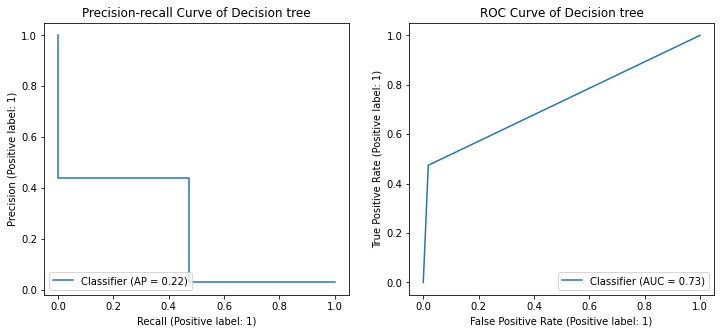

In [489]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');

m = ['Standard Decision tree']
p_auc = [pr_auc_tree]
r_auc = [roc_auc_tree]

f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2 = [f2_tree]

### 2. Weighted Decision tree(‘balanced’)

              Predicted NO   Predicted YES
 Actual NO          139693            2027
 Actual YES           2464            1762
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    141720
         1.0       0.47      0.42      0.44      4226

    accuracy                           0.97    145946
   macro avg       0.72      0.70      0.71    145946
weighted avg       0.97      0.97      0.97    145946

F2 score: 0.42574783743294836


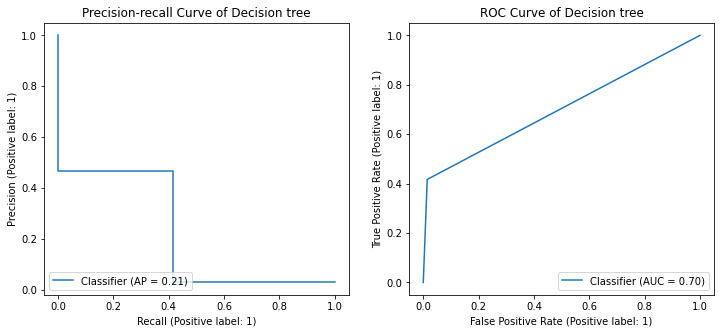

In [490]:
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, y_train.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');


m.append('Weighted Decision tree(‘balanced’)')
p_auc.append(pr_auc_tree)
r_auc.append(roc_auc_tree)
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2.append(f2_tree)

### 3. Weighted Decision tree(manual weights)

In [256]:
tree = DecisionTreeClassifier()
weights = np.linspace(0.00001,0.99,200)
tree_params = { 
#                "max_depth": range(1, 30), 
#                "max_features": range(1, 200, 50),
#                "class_weigh": [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
                 'class_weight': [{0:x, 1:1.0-x} for x in weights],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, scoring='recall')

In [262]:
tree_grid.fit(X_train, y_train.values.ravel())
tree_grid.best_params_

{0: 0.9697959183673469, 1: 0.03020408163265309}

              Predicted NO   Predicted YES
 Actual NO          138909            2811
 Actual YES           2131            2095
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    141720
         1.0       0.43      0.50      0.46      4226

    accuracy                           0.97    145946
   macro avg       0.71      0.74      0.72    145946
weighted avg       0.97      0.97      0.97    145946

F2 score: 0.4802842732691427


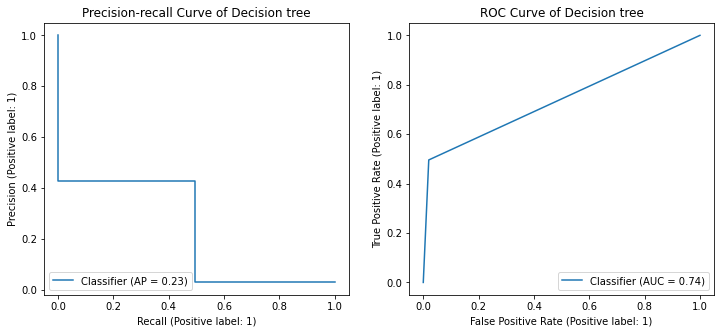

In [491]:
tree = DecisionTreeClassifier(class_weight={0: 0.9697959183673469, 1: 0.03020408163265309})
tree.fit(X_train, y_train.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');




m.append('Weighted Decision tree(manual weights)')
p_auc.append(pr_auc_tree)
r_auc.append(roc_auc_tree)
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2.append(f2_tree)

### 4. Grid Search for Decision tree With Random Undersampling

In [263]:
tree = DecisionTreeClassifier()

tree_params = { 
               "max_depth": range(1, 30), 
               "max_features": range(1, 14),
#                "class_weigh": [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
                #  'class_weight': [{0:x, 1:1.0-x} for x in weights],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, scoring='recall')

In [264]:
tree_grid.fit(X_rus, y_rus.values.ravel())
tree_grid.best_params_

{'max_depth': 12, 'max_features': 10}

              Predicted NO   Predicted YES
 Actual NO          110294           31426
 Actual YES            879            3347
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87    141720
         1.0       0.10      0.79      0.17      4226

    accuracy                           0.78    145946
   macro avg       0.54      0.79      0.52    145946
weighted avg       0.97      0.78      0.85    145946

F2 score: 0.32383845811482864


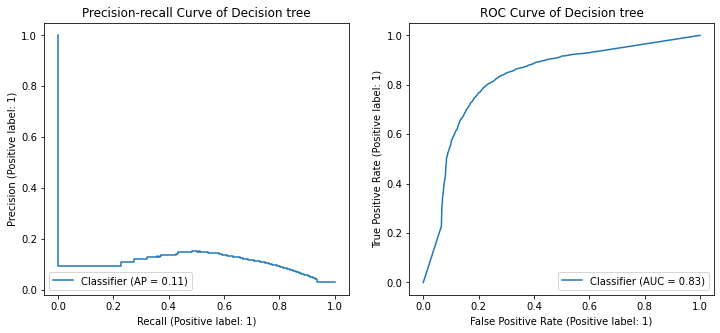

In [492]:
tree = DecisionTreeClassifier(max_depth=12, max_features=10 )
tree.fit(X_rus, y_rus.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');


m.append('Random Undersampling')
p_auc.append(pr_auc_tree)
r_auc.append(roc_auc_tree)
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2.append(f2_tree)

### 5. Grid Search for Decision tree With Random Oversampling

In [267]:
tree_grid.fit(X_ros, y_ros.values.ravel())
tree_grid.best_params_

{'max_depth': 29, 'max_features': 7}

              Predicted NO   Predicted YES
 Actual NO          139189            2531
 Actual YES           2339            1887
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    141720
         1.0       0.43      0.45      0.44      4226

    accuracy                           0.97    145946
   macro avg       0.71      0.71      0.71    145946
weighted avg       0.97      0.97      0.97    145946

F2 score: 0.44250070349873366


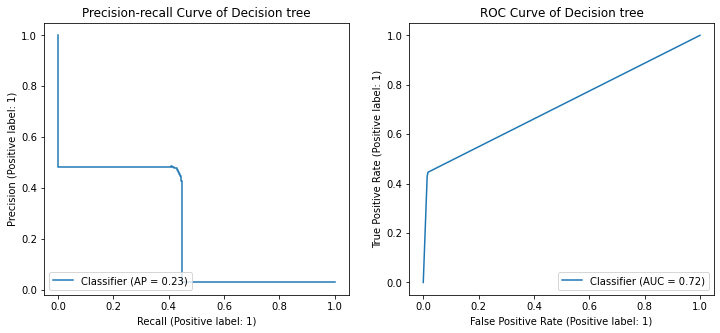

In [493]:
tree = DecisionTreeClassifier(max_depth=29, max_features=7 )
tree.fit(X_ros, y_ros.values.ravel())

y_pred = tree.predict(X_test)
print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');


m.append('Random Oversampling')
p_auc.append(pr_auc_tree)
r_auc.append(roc_auc_tree)
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2.append(f2_tree)

### 6. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).

In [287]:
tree_grid.fit(X_smteen, y_smteen.values.ravel())
tree_grid.best_params_

{'max_depth': 23, 'max_features': 13}

              Predicted NO   Predicted YES
 Actual NO          134118            7602
 Actual YES           1754            2472
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    141720
         1.0       0.25      0.58      0.35      4226

    accuracy                           0.94    145946
   macro avg       0.62      0.77      0.66    145946
weighted avg       0.97      0.94      0.95    145946

F2 score: 0.45815108607013116


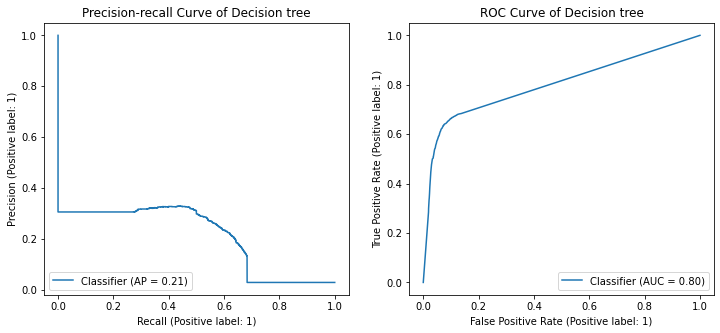

In [494]:
tree = DecisionTreeClassifier(max_depth=23, max_features=13 )
tree.fit(X_smteen, y_smteen.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');


m.append('SMOTEEN')
p_auc.append(pr_auc_tree)
r_auc.append(roc_auc_tree)

f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)
f2.append(f2_tree)

In [495]:
p_auc = [ '%0.3f' % i for i in p_auc]
r_auc = [ '%0.3f' % i for i in r_auc]
f2 = [ '%0.3f' % i for i in f2]
pd.DataFrame([p_auc, r_auc, f2], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=m)

,Standard Decision tree,Weighted Decision tree(‘balanced’),Weighted Decision tree(manual weights),Random Undersampling,Random Oversampling,SMOTEEN
Precision-Recall AUC,0.223,0.211,0.226,0.106,0.231,0.209
ROC AUC,0.728,0.701,0.738,0.828,0.715,0.801
F2,0.467,0.426,0.480,0.324,0.443,0.458


based on these results, it can be decided that ***SMOTEEN*** performs better than others.

## Random Forest

1. Standard Random Forest
2. Weighted Random Forest(‘balanced’)
3. Weighted Random Forest(manual weights)
4. Random Forest With Random Undersampling
5. Random Forest With Random Oversampling
6. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).


### 1. Standard Random Forest

              Predicted NO   Predicted YES
 Actual NO          141611             109
 Actual YES           2832            1394
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.93      0.33      0.49      4226

    accuracy                           0.98    145946
   macro avg       0.95      0.66      0.74    145946
weighted avg       0.98      0.98      0.98    145946

F2 score: 0.3786602922801108


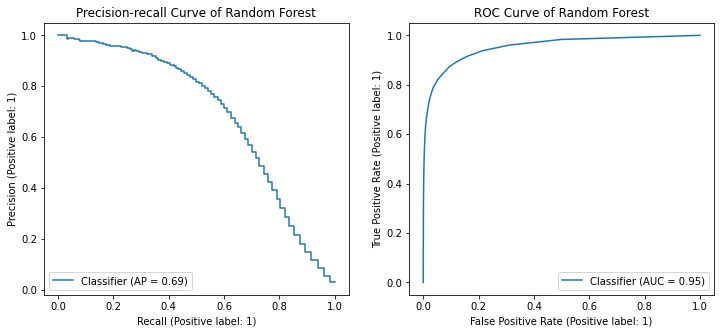

In [496]:
rfc = RandomForestClassifier(random_state=17)
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');

m = ['Standard Random Forest']
p_auc = [pr_auc_rf]
r_auc = [roc_auc_rf]
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2 = [f2_rf]

In [199]:
y_test.value_counts()

CANCELLED
0.0          141832
1.0            4165
dtype: int64

### 2. Weighted Random Forest(‘balanced’)

              Predicted NO   Predicted YES
 Actual NO          141617             103
 Actual YES           2968            1258
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.92      0.30      0.45      4226

    accuracy                           0.98    145946
   macro avg       0.95      0.65      0.72    145946
weighted avg       0.98      0.98      0.97    145946

F2 score: 0.3443744867232412


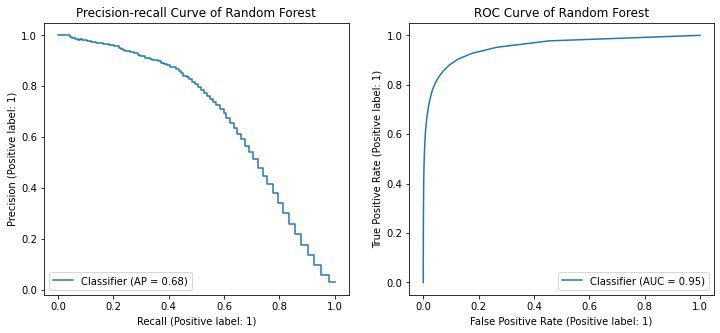

In [497]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=17)
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');


m.append('Weighted Random Forest(‘balanced’)')
p_auc.append(pr_auc_rf)
r_auc.append(roc_auc_rf)

f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2.append(f2_rf)

### 3. Weighted Random Forest(manual weights)

In [132]:
rfc = RandomForestClassifier(random_state=17)
weights = np.linspace(0.0,0.99,30)

params = { 
                 'class_weight': [{0:x, 1:1.0-x} for x in weights],
}

rfc_grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1, scoring='recall')


In [ ]:
rfc_grid.fit(X_train, y_train.values.ravel())
rfc_grid.best_params_

{'class_weight': {0: 0.03413793103448276, 1: 0.9658620689655173}}

              Predicted NO   Predicted YES
 Actual NO          141614             106
 Actual YES           2948            1278
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.92      0.30      0.46      4226

    accuracy                           0.98    145946
   macro avg       0.95      0.65      0.72    145946
weighted avg       0.98      0.98      0.97    145946

F2 score: 0.3494094488188977


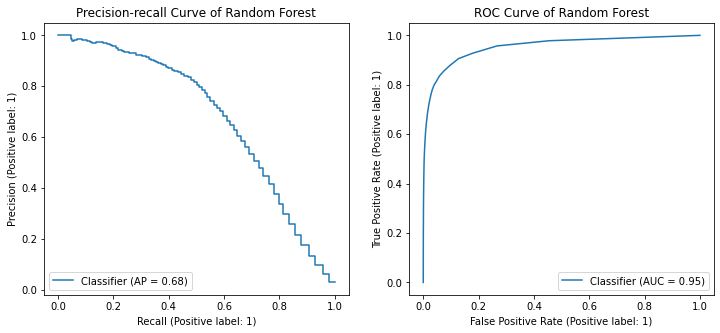

In [498]:
rfc = RandomForestClassifier(class_weight={0: 0.03413793103448276, 1: 0.9658620689655173})
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');


m.append('Weighted Random Forest(manual weights)')
p_auc.append(pr_auc_rf)
r_auc.append(roc_auc_rf)
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2.append(f2_rf)

### 4. Random Forest With Random Undersampling

In [149]:
rfc=RandomForestClassifier()

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': range(1, 14),
    'max_depth' :  range(1, 30, 3),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=5)

In [156]:
CV_rfc.fit(X_rus, y_rus.values.ravel())
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

              Predicted NO   Predicted YES
 Actual NO          111722           29998
 Actual YES            870            3356
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88    141720
         1.0       0.10      0.79      0.18      4226

    accuracy                           0.79    145946
   macro avg       0.55      0.79      0.53    145946
weighted avg       0.97      0.79      0.86    145946

F2 score: 0.3338771936806081


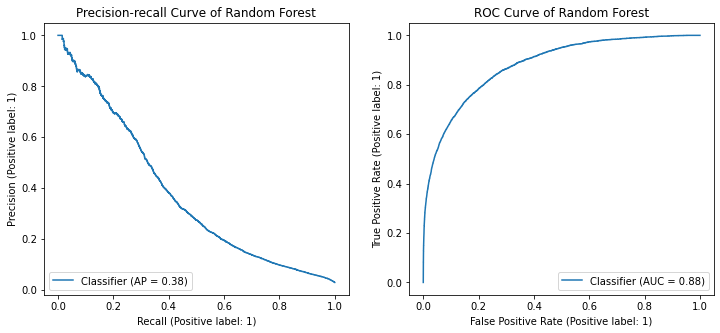

In [499]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 8 , max_features = 'log2', n_estimators = 100)
rfc.fit(X_rus, y_rus.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');


m.append('Random Undersampling')
p_auc.append(pr_auc_rf)
r_auc.append(roc_auc_rf)
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2.append(f2_rf)

### 5. Random Forest With Random Oversampling

              Predicted NO   Predicted YES
 Actual NO          141489             231
 Actual YES           2429            1797
____________________________________________

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    141720
         1.0       0.89      0.43      0.57      4226

    accuracy                           0.98    145946
   macro avg       0.93      0.71      0.78    145946
weighted avg       0.98      0.98      0.98    145946

F2 score: 0.4745932812169872


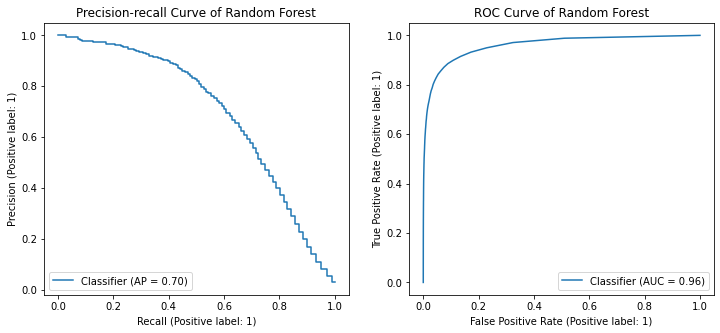

In [500]:
rfc = RandomForestClassifier()
rfc.fit(X_ros, y_ros.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');

m.append('Random Oversampling')
p_auc.append(pr_auc_rf)
r_auc.append(roc_auc_rf)
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2.append(f2_rf)

### 7. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours(SMOTEEN).

              Predicted NO   Predicted YES
 Actual NO          140623            1097
 Actual YES           2068            2158
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    141720
         1.0       0.66      0.51      0.58      4226

    accuracy                           0.98    145946
   macro avg       0.82      0.75      0.78    145946
weighted avg       0.98      0.98      0.98    145946

F2 score: 0.5352448038097128


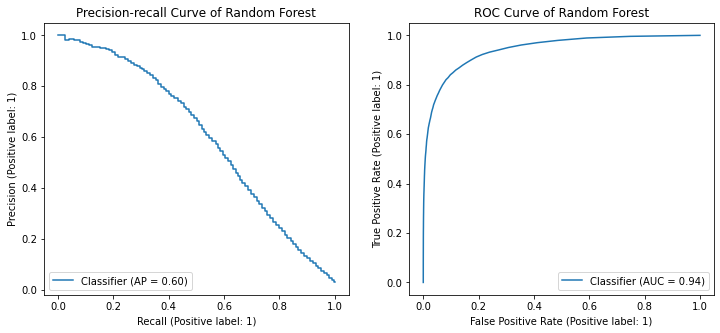

In [501]:
rfc = RandomForestClassifier()
rfc.fit(X_smteen, y_smteen.values.ravel()) 

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');

m.append('SMOTEEN')
p_auc.append(pr_auc_rf)
r_auc.append(roc_auc_rf)
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)
f2.append(f2_rf)

In [502]:
p_auc = [ '%0.3f' % i for i in p_auc]
r_auc = [ '%0.3f' % i for i in r_auc]
f2 = [ '%0.3f' % i for i in f2]
pd.DataFrame([p_auc, r_auc, f2], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=m)

,Standard Random Forest,Weighted Random Forest(‘balanced’),Weighted Random Forest(manual weights),Random Undersampling,Random Oversampling,SMOTEEN
Precision-Recall AUC,0.689,0.682,0.680,0.377,0.698,0.603
ROC AUC,0.954,0.953,0.954,0.881,0.959,0.944
F2,0.379,0.344,0.349,0.334,0.475,0.535


based on these results, it can be decided that ***SMOTEEN*** performs better than others.

## XGBoost 
1. Standard XGBoost
2. Weighted XGBoost for Class Imbalance
3. Tune the Class Weighting Hyperparameter

In [191]:
! pip install xgboost

     |████████████████████████████████| 1.7 MB 723 kB/s eta 0:00:01


In [192]:
!pip install --upgrade xgboost

In [336]:
from xgboost import XGBClassifier

### 1. Standard XGBoost

              Predicted NO   Predicted YES
 Actual NO          141538             182
 Actual YES           2067            2159
____________________________________________

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    141720
         1.0       0.92      0.51      0.66      4226

    accuracy                           0.98    145946
   macro avg       0.95      0.75      0.82    145946
weighted avg       0.98      0.98      0.98    145946

F2 score: 0.5609249155624838


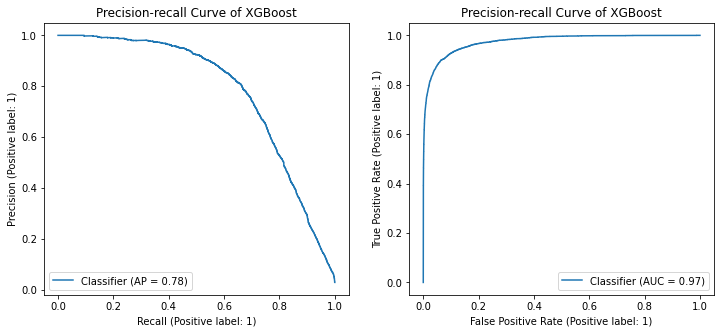

In [503]:
model = XGBClassifier()
model.fit(X_train, y_train.values.ravel()) 

# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'Precision-recall Curve of XGBoost');

m = ['Standard XGBoost']
p_auc = [pr_auc_xgb]
r_auc = [roc_auc_xgb]
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)
f2 = [f2_xgb]

### 2. Weighted XGBoost for Class Imbalance


https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [352]:
# estimate a value for the scale_pos_weight xgboost hyperparameter

# As such, the scale_pos_weight can be used to train a class-weighted or cost-sensitive 
# scale_pos_weight = total_negative_examples / total_positive_examples

# estimate scale_pos_weight value
estimate = y_train.value_counts()[0] / y_train.value_counts()[1]
print('Estimate: %.3f' % estimate)

Estimate: 34.027


This will give classification errors made by the model on the minority class (positive class) 34.027 times more impact

              Predicted NO   Predicted YES
 Actual NO          132719            9001
 Actual YES            419            3807
____________________________________________

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    141720
         1.0       0.30      0.90      0.45      4226

    accuracy                           0.94    145946
   macro avg       0.65      0.92      0.71    145946
weighted avg       0.98      0.94      0.95    145946

F2 score: 0.6406502423263328


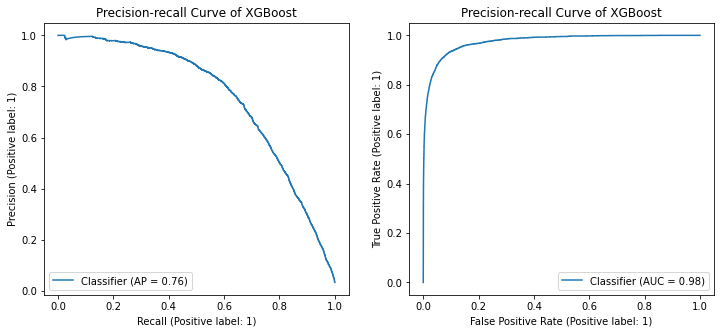

In [504]:
model = XGBClassifier(scale_pos_weight=34.027)

model.fit(X_train, y_train.values.ravel()) 
# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'Precision-recall Curve of XGBoost');

m.append('Weighted XGBoost for Class Imbalance')
p_auc.append(pr_auc_xgb)
r_auc.append(roc_auc_xgb)
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)
f2.append(f2_xgb)

### 3. Tune the Class Weighting Hyperparameter

We will try the following weightings for the positive class:

1 (default)<br>
10<br>
25<br>
34 (recommended)<br>
50<br>
75<br>
99<br>
100<br>
1000<br>

In [362]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = XGBClassifier(scale_pos_weight=34.027)

weights = [1, 10, 20, 25, 34, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')

In [373]:
# execute the grid search
grid_result = grid.fit(X_train, y_train)

grid_result.best_params_

{'scale_pos_weight': 20}

              Predicted NO   Predicted YES
 Actual NO          136402            5318
 Actual YES            601            3625
____________________________________________

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    141720
         1.0       0.41      0.86      0.55      4226

    accuracy                           0.96    145946
   macro avg       0.70      0.91      0.76    145946
weighted avg       0.98      0.96      0.97    145946

F2 score: 0.7012419236275003


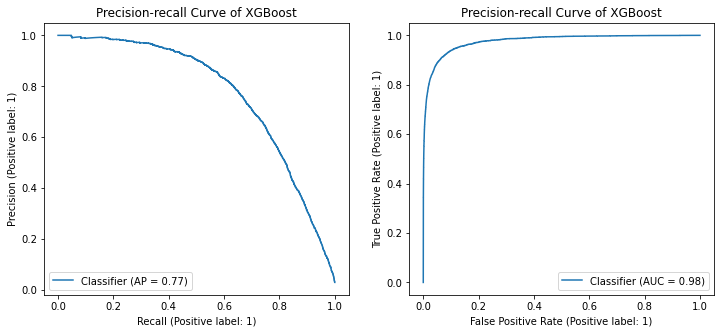

In [507]:
model = XGBClassifier(scale_pos_weight=20)

model.fit(X_train, y_train.values.ravel()) 
# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'Precision-recall Curve of XGBoost');

m.append('Tune the Class Weighting Hyperparameter')
p_auc.append(pr_auc_xgb)
r_auc.append(roc_auc_xgb)
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)
f2.append(f2_xgb)

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

In [519]:
p_auc = [ '%0.3f' % i for i in p_auc]
r_auc = [ '%0.3f' % i for i in r_auc]
f2 = [ '%0.3f' % i for i in f2]
pd.DataFrame([p_auc, r_auc, f2], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=m)

,Standard XGBoost,Weighted XGBoost for Class Imbalance,Tune the Class Weighting Hyperparameter
Precision-Recall AUC,0.782,0.758,0.775
ROC AUC,0.975,0.975,0.976
F2,0.561,0.641,0.701


based on these results, it can be decided that ***Tune the Class Weighing Hyperparameters*** performs better than others.

# Conclusion

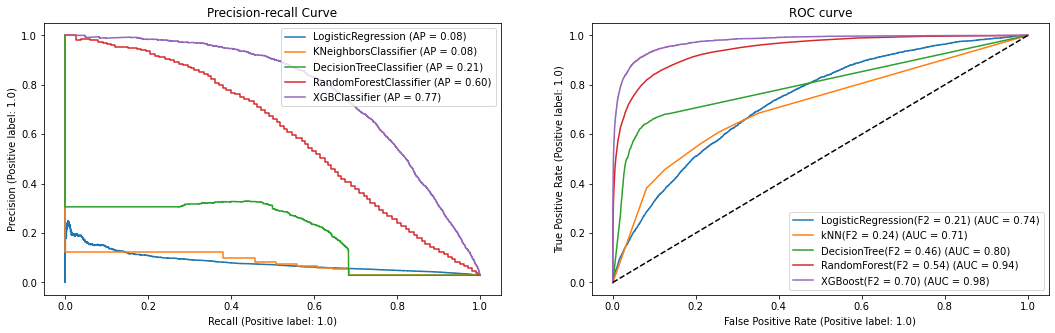

In [536]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5) )

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(knn, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax[0])
ax[0].set(title = 'Precision-recall Curve');
ax[0].legend(loc = 'upper right')

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax[1], 
                               name = 'LogisticRegression(F2 = %0.2f)' %f2_lr)
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax[1], 
                               name = 'kNN(F2 = %0.2f)' %f2_knn)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax[1], 
                               name = 'DecisionTree(F2 = %0.2f)' %f2_tree)
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax[1], 
                               name = 'RandomForest(F2 = %0.2f)' %f2_rf)
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1], 
                               name = 'XGBoost(F2 = %0.2f)' %f2_xgb)
ax[1].set(title = 'ROC curve');
ax[1].plot([0, 1], [0, 1],'--', color='black');

As we see from above Precision-Recall and ROC-curves, XGBoost model with tuned parameters performs better than any other model with <br>
**F2 score = 0.70 <br>
AP score = 0.77<br>
Roc AUC score = 0.98.**

